In [0]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# **Data Generation**

This function will create an (m x 2)-sized array called data that holds (x, y) values for our model. It also creates an (m x 1)-sized array that holds the label information for each respective row in data.

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m, 2))
  labels = np.zeros((m, 1))
  for i in range(m):
    c = random.randint(0, 1)

    # First feature, x_1 is chosen uniformly at random within this interval
    x_1 = np.random.uniform(0, 1)

    # Get the "noise" that will be used to get our second feature, x_2
    n = np.random.normal(mu, sigma)

    # Get second feature, x_2 
    x_2 = w * x_1 + b + math.pow(-1, c) * n
    #x_2= w * x_1 + b + (-1)**c * n

    # Row i of data consists of (x_1, x_2)
    # Row i of vector labels consists of our label for this set of data, c
    data[i][0] = x_1
    data[i][1] = x_2
    labels[i] = c

  # print(data)

  return data, labels

This function graphs the data made in get_random_data(), as well as the function y = w * x + b

In [0]:
def display_random_data(labels, data, w,  b):
  plt.style.use('seaborn')

  zerosX = []
  zerosY = []
  onesX = []
  onesY = []
  # Separate the two labels into different lists based on if they were 0 or 1
  for i in range(len(labels)):
    if labels[i] == 0:
      zerosX.append(data[i][0])
      zerosY.append(data[i][1])
    else:
      onesX.append(data[i][0])
      onesY.append(data[i][1])

  # Plot the scatterplots
  plt.scatter(zerosX, zerosY, label='0', c="blue", edgecolor="black", linewidth=1, alpha=0.75)
  plt.scatter(onesX, onesY, label='1', c="red", edgecolor="black", linewidth=1, alpha=0.75)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Randomly Generated Data")

  # Plot the function y = m * w + b
  # print(data[:,0])
  
  x = np.linspace(0, 1, 100)
  y = w * x + b 
  
  plt.plot(x,y)

 # plt.show()


Create the initial values for (w, b, mu, sigma, m) that will be used for our model and gather the respective data values. Also, let's create our training and validation sets, which will be 80% and 20% of our data. 

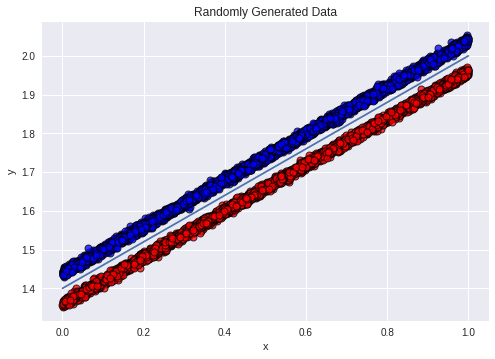

In [0]:
w = 0.6
b = 1.4
mu = 0.04
sigma = 0.006
m = 10000

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(labels, data, w, b)

# Get that 80-20 split index
data_split = int(80/100 * m)

# Now get the data itself
train_data, test_data = data[:data_split], data[data_split:]
train_labels, test_labels = labels[:data_split], labels[data_split:]

# print(train_data)
# print(test_data)

# **Model Building**

Time to start building Keras model. Import what's needed from Keras

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers


Create the structure of our model, including functions for training and evaluating new data after training

In [0]:
class Model():
  
  def __init__(self):
    self.network = tf.keras.models.Sequential()
    self.dense_layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
    self.network.add(self.dense_layer)

  def train(self, x, y, epochs, batch_size, lr, validation_data):
    self.network.compile(optimizer=tf.keras.optimizers.RMSprop(lr), loss='binary_crossentropy', metrics=['accuracy'])
    self.network.fit(x, y, epochs, batch_size, validation_data=validation_data)

  def get_weights(self):
    return self.dense_layer.get_weights()

  def predict(self, data):
    return self.network.predict(data)

  def evaluate(self, x, y):
    test_loss, test_acc = self.network.evaluate(x, y)
    self.network.summary()

    weights, bias = self.network.get_weights()
    print("Accuracy:", test_acc)
    print("Loss:", test_loss)
    print("Weights:", weights)
    print("Bias:", bias)

Create and train a model with our given data

In [0]:
nn = Model()

epochs = 10
batch_size = 8
lr = 0.01
nn.train(train_data, train_labels, epochs, batch_size, lr, (test_data, test_labels))

Epoch 1/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5576 - val_loss: 0.6827 - val_accuracy: 0.5035
Epoch 2/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.6261 - val_loss: 0.6775 - val_accuracy: 0.4965
Epoch 3/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6752 - accuracy: 0.6401 - val_loss: 0.6712 - val_accuracy: 0.6865
Epoch 4/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.6701 - val_loss: 0.6663 - val_accuracy: 0.8080
Epoch 5/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6653 - accuracy: 0.6898 - val_loss: 0.6614 - val_accuracy: 0.8695
Epoch 6/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6604 - accuracy: 0.7545 - val_loss: 0.6566 - val_accuracy: 0.7840
Epoch 7/8
800/800 [==============================] - 1s 1ms/step - loss: 0.6555 - accuracy: 0.7343 - val_loss: 0.6520 - val_accuracy: 0.8445
Epoch 8/8
800

Check the accuracy and loss rate of our network 

In [0]:
nn.evaluate(test_data, test_labels)

63/63 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.8225
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Accuracy: 0.8224999904632568
Loss: 0.647187352180481
Weights: [[ 1.593678]
 [-2.372776]]
Bias: [3.166436]


# **Predictions**

In [0]:
pred = nn.predict(test_data)

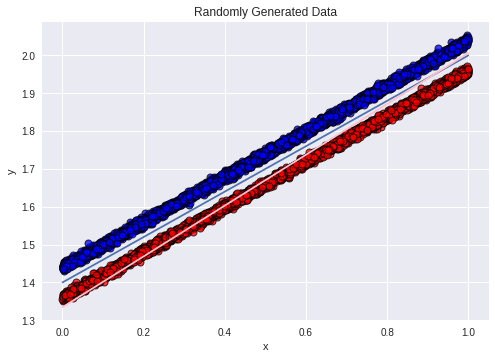

In [0]:
display_random_data(labels, data, w, b)
weights, bias = nn.get_weights()

xl = np.linspace(0, 1, 100)
yl = -((weights[0] * xl + bias)/weights[1])
plt.plot(xl, yl, color='pink')
plt.show()

Locator attempting to generate 10001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


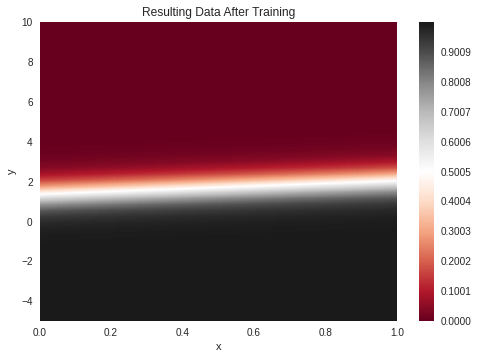

In [0]:
xl = np.linspace(0,1)
yl = np.linspace(-5,10)

xlb, ylb = np.meshgrid(xl, yl)

z = weights[0] * xlb + weights[1] * ylb + bias
a = 1.0 / (1.0 + np.exp(np.negative(z)))

# plt.xlim([0,1])
# plt.ylim([0, 10])

plt.contourf(xlb, ylb, a, m, cmap='RdGy')
plt.colorbar()
plt.title("Resulting Data After Training")
plt.xlabel("x")
plt.ylabel("y")
plt.show()